<a href="https://colab.research.google.com/github/kothapallypavithra/2095_DataAnalysis/blob/main/2203A52095_DAUP_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

anger, fear, joy, love, sadness, and surprise

In [ ]:
!pip install --upgrade jaxlib jax
!pip install --upgrade numpy
!pip install --upgrade tensorflow
!pip install --upgrade gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 68.4 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 62.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2

In [ ]:
# Uninstall NumPy and Pandas
!pip uninstall -y numpy pandas

# Reinstall NumPy
!pip install --no-cache-dir numpy==1.26.4

# Reinstall Pandas
!pip install --no-cache-dir pandas==2.2.2

# Restart Kernel
import os
os._exit(00)


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 251.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires pandas>=0.24.0, which is not installed.
sklearn-pandas 2.2.0 requires pandas>=1.1.4, which is not installed.
shap 0.47.1 requires pandas, which is not installed.
holoviews 1.20.2 requires pandas>=1.3, which is not installed.
fastai 2.7.19 requires pandas, which is not installed.
bqplot 0.12.44 requires pandas<3.0.0,>=1.0.0, which is not installed.
bigframes 1.42.0 requires pandas>=1.5.3, which is not installed.
arviz 0.21

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("/content/training.csv")
val_df = pd.read_csv("/content/validation.csv")
test_df = pd.read_csv("/content/test.csv")


In [ ]:
print(train_df.head())
print(test_df.head())
print(val_df.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0
                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cra

In [ ]:
print(train_df["label"].value_counts())


label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


In [ ]:
'''!pip install gensim'''

'!pip install gensim'

In [ ]:
'''import tensorflow as tf
import pandas as pd
import numpy as np
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight



# ✅ Step 2: Encode Sentiment Labels
label_encoder = LabelEncoder()
train_df["label"] = label_encoder.fit_transform(train_df["label"])
val_df["label"] = label_encoder.transform(val_df["label"])
test_df["label"] = label_encoder.transform(test_df["label"])

# ✅ Step 3: Convert Text & Labels into Lists
X_train, y_train = train_df["text"].astype(str).tolist(), train_df["label"]
X_val, y_val = val_df["text"].astype(str).tolist(), val_df["label"]
X_test, y_test = test_df["text"].astype(str).tolist(), test_df["label"]

# ✅ Step 4: Compute Class Weights for Balanced Training
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# ✅ Step 5: Load BERT Tokenizer
bert_model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

# Function to tokenize text
def encode_texts(texts, max_length=100):
    return tokenizer(
        list(texts),
        max_length=max_length,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

# Tokenize Data
train_encodings = encode_texts(X_train)
val_encodings = encode_texts(X_val)
test_encodings = encode_texts(X_test)

# Convert labels to categorical format
num_classes = len(label_encoder.classes_)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# ✅ Step 6: Build BERT + LSTM Model
class BertLSTMClassifier(Model):
    def __init__(self, bert_model, num_classes, dropout_rate=0.3, lstm_units=128):
        super(BertLSTMClassifier, self).__init__()
        self.bert = bert_model
        self.lstm = Bidirectional(LSTM(lstm_units, return_sequences=False))
        self.dropout = Dropout(dropout_rate)
        self.dense = Dense(num_classes, activation="softmax")  # Multi-class classification

    def call(self, inputs):
        bert_output = self.bert(inputs)[0]  # BERT last hidden state
        lstm_output = self.lstm(bert_output)
        dropout_output = self.dropout(lstm_output)
        return self.dense(dropout_output)

# Load Pretrained BERT Model
bert = TFBertModel.from_pretrained(bert_model_name)

# Initialize Model
bert_lstm_classifier = BertLSTMClassifier(bert, num_classes)

# ✅ Step 7: Compile Model
bert_lstm_classifier.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=2e-5),
    metrics=["accuracy"]
)

# ✅ Step 8: Train Model with Class Weights
history = bert_lstm_classifier.fit(
    {"input_ids": train_encodings["input_ids"], "attention_mask": train_encodings["attention_mask"]},
    y_train_cat,
    validation_data=(
        {"input_ids": val_encodings["input_ids"], "attention_mask": val_encodings["attention_mask"]},
        y_val_cat
    ),
    epochs=5,
    batch_size=16,
    class_weight=class_weights  # Apply class weights for balance
)

# ✅ Step 9: Evaluate Model
loss, accuracy = bert_lstm_classifier.evaluate(
    {"input_ids": test_encodings["input_ids"], "attention_mask": test_encodings["attention_mask"]},
    y_test_cat
)
print(f"🔥 Test Accuracy: {accuracy:.4f}")

# ✅ Step 10: Save Model & Label Encoder
bert_lstm_classifier.save("bert_lstm_sentiment_model.h5")
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# ✅ Step 11: Prediction Function
def predict_emotion(text):
    tokens = encode_texts([text])
    preds = bert_lstm_classifier.predict(
        {"input_ids": tokens["input_ids"], "attention_mask": tokens["attention_mask"]}
    )
    emotion = label_encoder.inverse_transform([preds.argmax()])[0]
    return emotion

# Test Prediction

sample_text = "I'm feeling really happy today!"
predicted_emotion = predict_emotion(sample_text)
print(f"Predicted Emotion: {predicted_emotion}")
'''

'import tensorflow as tf\nimport pandas as pd\nimport numpy as np\nfrom transformers import BertTokenizer, TFBertModel\nfrom tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.optimizers import Adam\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.utils.class_weight import compute_class_weight\n\n\n\n# ✅ Step 2: Encode Sentiment Labels\nlabel_encoder = LabelEncoder()\ntrain_df["label"] = label_encoder.fit_transform(train_df["label"])\nval_df["label"] = label_encoder.transform(val_df["label"])\ntest_df["label"] = label_encoder.transform(test_df["label"])\n\n# ✅ Step 3: Convert Text & Labels into Lists\nX_train, y_train = train_df["text"].astype(str).tolist(), train_df["label"]\nX_val, y_val = val_df["text"].astype(str).tolist(), val_df["label"]\nX_test, y_test = test_df["text"].astype(str).tolist(), test_df["label"]\n\n# ✅ Step 4: Compute Class Weights for Balanced Training\nclass_weights = co

In [ ]:
'''import pandas as pd
import numpy as np
import tensorflow as tf
import gensim
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder


# ✅ Step 2: Encode Sentiment Labels
label_encoder = LabelEncoder()
train_df["label"] = label_encoder.fit_transform(train_df["label"])
val_df["label"] = label_encoder.transform(val_df["label"])
test_df["label"] = label_encoder.transform(test_df["label"])

# ✅ Step 3: Prepare Text Data
X_train, y_train = train_df["text"].astype(str).tolist(), train_df["label"]
X_val, y_val = val_df["text"].astype(str).tolist(), val_df["label"]
X_test, y_test = test_df["text"].astype(str).tolist(), test_df["label"]

# ✅ Step 4: Tokenize Text
max_vocab_size = 10000  # Maximum words to keep
max_length = 100  # Max sequence length

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding="post")
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=max_length, padding="post")
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length, padding="post")

# ✅ Step 5: Train Word2Vec Embeddings
sentences = [text.split() for text in X_train]
word2vec_model = gensim.models.Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)
word_vectors = word2vec_model.wv

# ✅ Step 6: Create Embedding Matrix
embedding_dim = 300  # Word2Vec vector size
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]
    else:
        embedding_matrix[i] = np.random.normal(size=(embedding_dim,))

# ✅ Step 7: Compute Class Weights for Imbalanced Data
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Convert labels to categorical
num_classes = len(label_encoder.classes_)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# ✅ Step 8: Build Word2Vec + LSTM Model
model = Sequential([
    Embedding(input_dim=len(word_index) + 1,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_length,
              trainable=False),  # Use pre-trained embeddings
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(num_classes, activation="softmax")
])

# ✅ Step 9: Compile Model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=2e-4), metrics=["accuracy"])

# ✅ Step 10: Train Model with Class Weights
history = model.fit(
    X_train_seq, y_train_cat,
    validation_data=(X_val_seq, y_val_cat),
    epochs=10, batch_size=32,
    class_weight=class_weights
)

# ✅ Step 11: Evaluate Model
loss, accuracy = model.evaluate(X_test_seq, y_test_cat)
print(f"🔥 Test Accuracy: {accuracy:.4f}")

# ✅ Step 12: Save Model & Tokenizer
model.save("word2vec_lstm_model.h5")
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# ✅ Step 13: Prediction Function
def predict_emotion(text):
    seq = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=max_length, padding="post")
    preds = model.predict(seq)
    emotion = label_encoder.inverse_transform([preds.argmax()])[0]
    return emotion

# Test Prediction
sample_text = "I'm feeling really happy today!"
predicted_emotion = predict_emotion(sample_text)
print(f"Predicted Emotion: {predicted_emotion}")'''


'import pandas as pd\nimport numpy as np\nimport tensorflow as tf\nimport gensim\nfrom tensorflow.keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.preprocessing.sequence import pad_sequences\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional\nfrom tensorflow.keras.optimizers import Adam\nfrom sklearn.utils.class_weight import compute_class_weight\nfrom sklearn.preprocessing import LabelEncoder\n\n\n# ✅ Step 2: Encode Sentiment Labels\nlabel_encoder = LabelEncoder()\ntrain_df["label"] = label_encoder.fit_transform(train_df["label"])\nval_df["label"] = label_encoder.transform(val_df["label"])\ntest_df["label"] = label_encoder.transform(test_df["label"])\n\n# ✅ Step 3: Prepare Text Data\nX_train, y_train = train_df["text"].astype(str).tolist(), train_df["label"]\nX_val, y_val = val_df["text"].astype(str).tolist(), val_df["label"]\nX_test, y_test = test_df["text"].astype(str).tolist(), test_df[

In [ ]:
!pip uninstall numpy gensim -y
!pip install --upgrade numpy gensim


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompa

Word2Vec+BILSTM++ATTENTION MECHANISM+HYPERPARAMETER TUNING

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, Input, Attention
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

# Load dataset (ensure train_df, val_df, test_df are loaded)

# Encode labels
label_encoder = LabelEncoder()
train_df["label"] = label_encoder.fit_transform(train_df["label"])
val_df["label"] = label_encoder.transform(val_df["label"])
test_df["label"] = label_encoder.transform(test_df["label"])

# Prepare text data
X_train, y_train = train_df["text"].astype(str).tolist(), train_df["label"]
X_val, y_val = val_df["text"].astype(str).tolist(), val_df["label"]
X_test, y_test = test_df["text"].astype(str).tolist(), test_df["label"]

# Tokenization
max_vocab_size = 15000
max_length = 120
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding="post")
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=max_length, padding="post")
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length, padding="post")

# Load Pretrained Word2Vec
word_vectors = api.load("word2vec-google-news-300")
embedding_dim = 300
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]
    else:
        embedding_matrix[i] = np.random.normal(size=(embedding_dim,))

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
class_weights = dict(enumerate(class_weights))

# Convert labels to categorical
num_classes = len(label_encoder.classes_)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# Define Improved Model (Word2Vec + Stacked BiLSTM + CNN + Attention)
def build_model():
    inputs = Input(shape=(max_length,))
    embedding = Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim,
                          weights=[embedding_matrix], input_length=max_length,
                          trainable=False)(inputs)
    lstm = Bidirectional(LSTM(128, return_sequences=True))(embedding)
    lstm = Bidirectional(LSTM(64, return_sequences=True))(lstm)  # Additional LSTM layer
    cnn = Conv1D(filters=64, kernel_size=3, activation='relu')(lstm)
    cnn = GlobalMaxPooling1D()(cnn)
    query = Dense(128, activation="tanh")(lstm)  # Adjusted Attention
    attention = Attention()([query, lstm])
    attention = GlobalMaxPooling1D()(attention)
    merged = tf.keras.layers.Concatenate()([cnn, attention])
    dense = Dense(128, activation="relu")(merged)
    dropout = Dropout(0.3)(dense)
    output = Dense(num_classes, activation="softmax")(dropout)
    return Model(inputs, output)

# Compile and Train Model
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=["accuracy"])
model.fit(X_train_seq, y_train_cat, validation_data=(X_val_seq, y_val_cat),
          epochs=30, batch_size=64, class_weight=class_weights)

# Evaluate
loss, accuracy = model.evaluate(X_test_seq, y_test_cat)
print(f" Test Accuracy: {accuracy:.4f}")

# Save Model
model.save("optimized_sentiment_model.h5")
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

def predict_emotion(text):
    seq = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=max_length, padding="post")
    preds = model.predict(seq)
    return label_encoder.inverse_transform([preds.argmax()])[0]

sample_text = "I'm feeling really happy today!"
print(f"Predicted Emotion: {predict_emotion(sample_text)}")


/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.5.3, so it will not be used.
  warnings.warn(


[==================================================] 100.0% 1662.8/1662.8MB downloaded


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.1799 - loss: 1.8051 - val_accuracy: 0.3170 - val_loss: 1.6681
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.3150 - loss: 1.6050 - val_accuracy: 0.3520 - val_loss: 1.4743
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.3646 - loss: 1.3835 - val_accuracy: 0.4730 - val_loss: 1.2695
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.4436 - loss: 1.1525 - val_accuracy: 0.5550 - val_loss: 1.0970
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5448 - loss: 0.9820 - val_accuracy: 0.6420 - val_loss: 0.9743
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6059 - loss: 0.8525 - val_accuracy: 0.6620 - val_loss: 0.8922
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6598 - loss: 0.7618 - val_accuracy: 0.6765 - val_loss: 0.8481
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7021 - loss: 0.6856 - val

 Test Accuracy: 0.8530
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
Predicted Emotion: 1


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.8530
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       581
           1       0.90      0.83      0.87       695
           2       0.61      0.86      0.71       159
           3       0.85      0.90      0.87       275
           4       0.86      0.83      0.85       224
           5       0.65      0.92      0.76        66

    accuracy                           0.85      2000
   macro avg       0.80      0.87      0.83      2000
weighted avg       0.87      0.85      0.86      2000



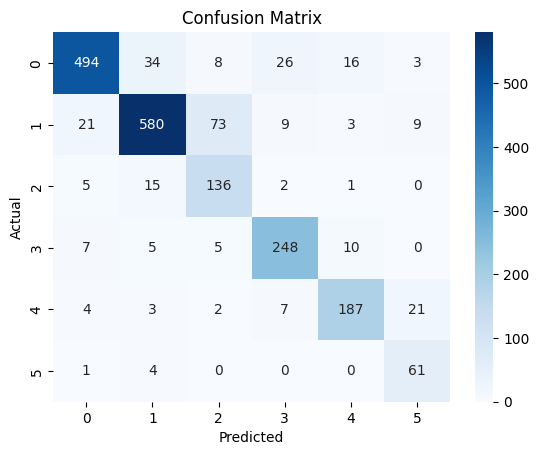

Type-1 Error (False Positive Rate): 0.0301
Type-2 Error (False Negative Rate): 0.1332
Z-Test Score: 25.7660, P-Value: 0.0000
T-Test Score: 2.5359, P-Value: 0.0113
ANOVA F-Statistic: 6.4307, P-Value: 0.0113


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
predictions = model.predict(X_test_seq)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test_cat, axis=1)

#  Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

#  Precision, Recall, F1-score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Type-1 and Type-2 Errors
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  # False Positives
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)  # False Negatives
TP = np.diag(conf_matrix)  # True Positives
TN = conf_matrix.sum() - (FP + FN + TP)  # True Negatives

type_1_error = FP / (FP + TN)  # False Positive Rate
type_2_error = FN / (FN + TP)  # False Negative Rate
print(f"Type-1 Error (False Positive Rate): {type_1_error.mean():.4f}")
print(f"Type-2 Error (False Negative Rate): {type_2_error.mean():.4f}")

# Z-Test (Comparing Model Proportions)
n1, n2 = len(true_labels), len(predicted_labels)
p1, p2 = accuracy, 0.5  # Assuming baseline accuracy is 50%
SE = np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))
z_score = (p1 - p2) / SE
p_value_z = 1 - stats.norm.cdf(z_score)
print(f"Z-Test Score: {z_score:.4f}, P-Value: {p_value_z:.4f}")

#  T-Test (Comparing Model Mean Performance)
t_stat, p_value_t = stats.ttest_ind(predicted_labels, true_labels, equal_var=False)
print(f"T-Test Score: {t_stat:.4f}, P-Value: {p_value_t:.4f}")

#  ANOVA Test (Checking Variance Differences)
F_stat, p_value_anova = stats.f_oneway(predicted_labels, true_labels)
print(f"ANOVA F-Statistic: {F_stat:.4f}, P-Value: {p_value_anova:.4f}")

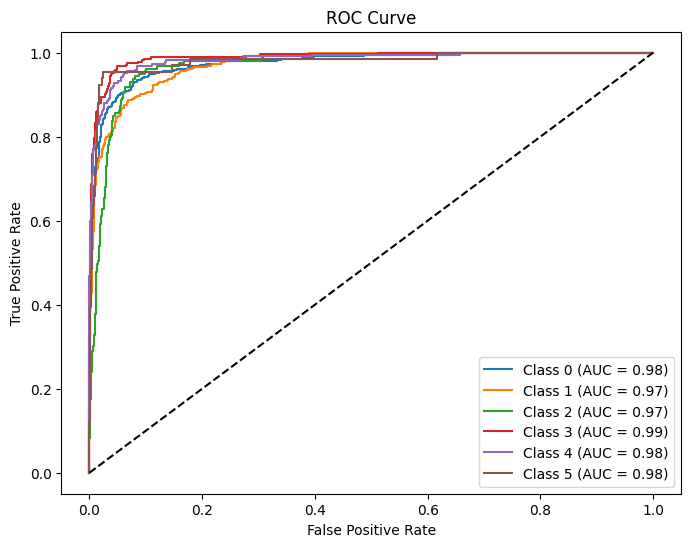

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--')

# Labels and Title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


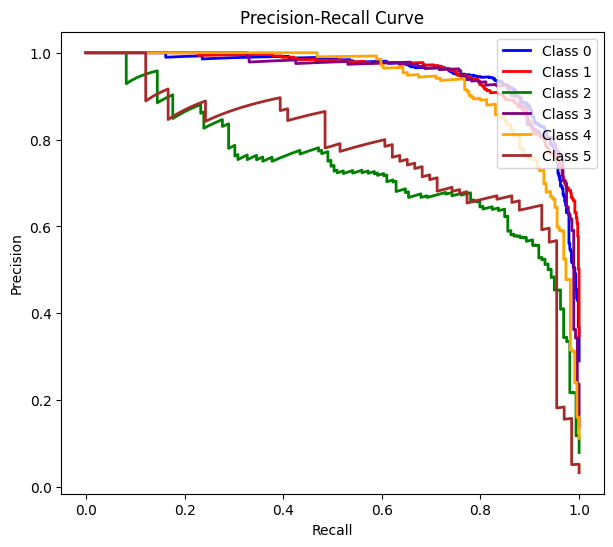

In [ ]:
# Plot Precision-Recall Curves
plt.figure(figsize=(7, 6))

for i, color in zip(range(num_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, color=color, lw=2, label=f"Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()
